In [1]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.impute import SimpleImputer 
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score, calinski_harabasz_score 
from sklearn.decomposition import PCA 
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline 


%matplotlib inline
plt.style.use('ggplot')
sns.set_palette("viridis") 

try:
    data_path = 'Mall_Customers.csv'
    df_original = pd.read_csv(data_path)
    print(f"Dataset cargado exitosamente desde {data_path}")
    print("Primeras 5 filas del dataset:")
    print(df_original.head(10))
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta especificada: {data_path}")
    print("Por favor, asegúrate de que el archivo CSV esté en la misma carpeta que el notebook o proporciona la ruta completa.")
    exit() # Detener si no se encuentra el archivo


df = df_original.copy()




     
      
    

Dataset cargado exitosamente desde Mall_Customers.csv
Primeras 5 filas del dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6
7           8  Female   23                  18                      94
8           9    Male   64                  19                       3
9          10  Female   30                  19                      72


In [2]:
df_original.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000



--- 1. Análisis Exploratorio de Datos (EDA) ---

Información General del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Estadísticas Descriptivas (Numéricas):
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000              

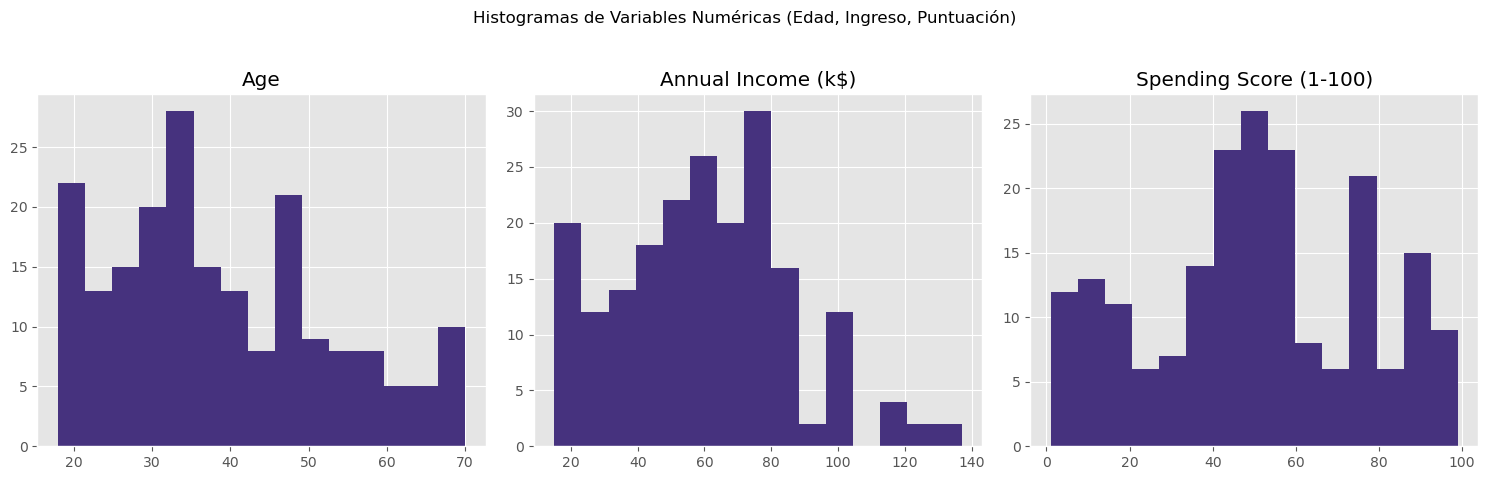


Generando boxplots para variables numéricas...


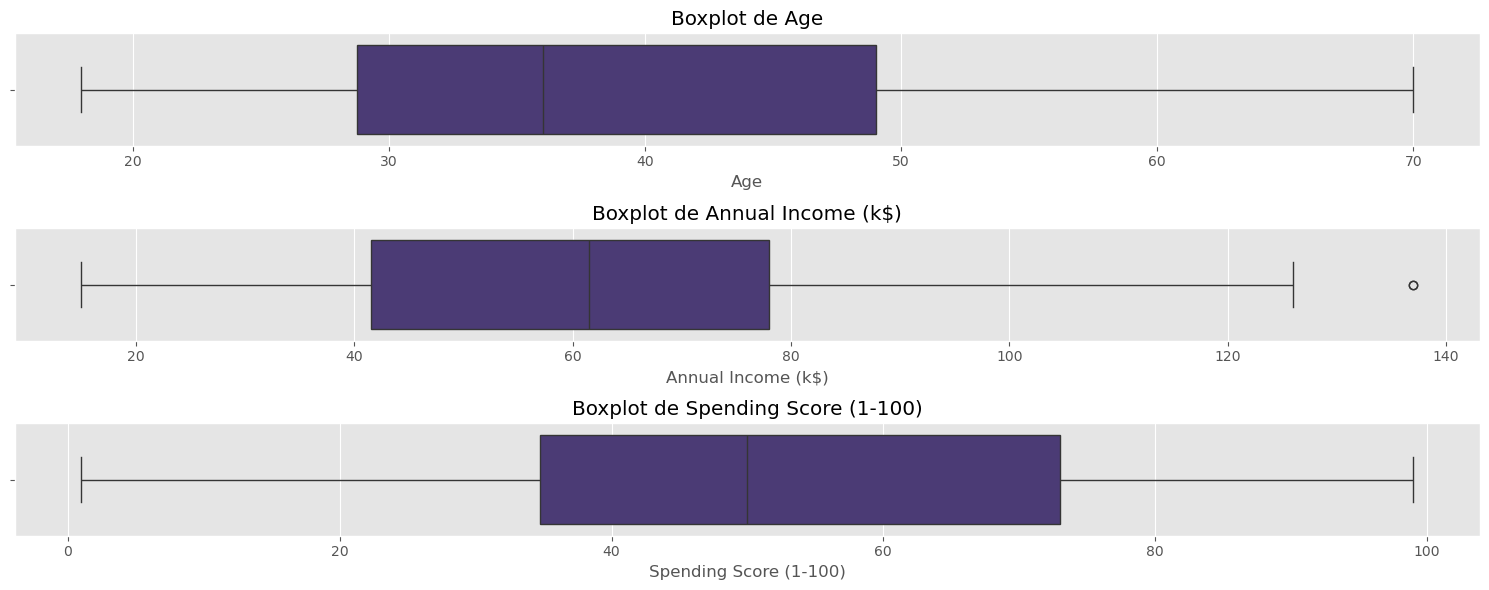


Análisis de la variable 'Gender':
Gender
Female    112
Male       88
Name: count, dtype: int64


C:\Users\carlos\AppData\Local\Temp\ipykernel_22596\2752368400.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='viridis')


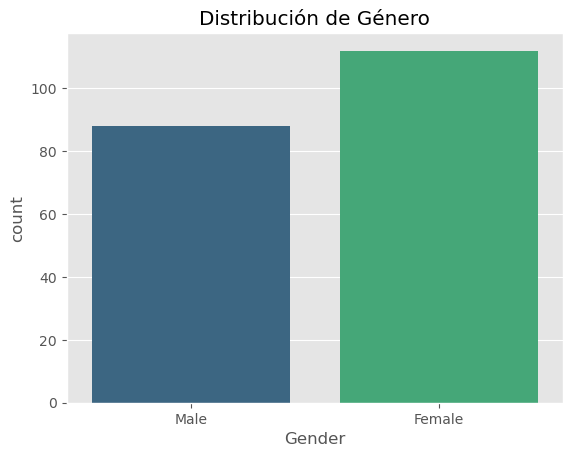


Generando matriz de correlación...


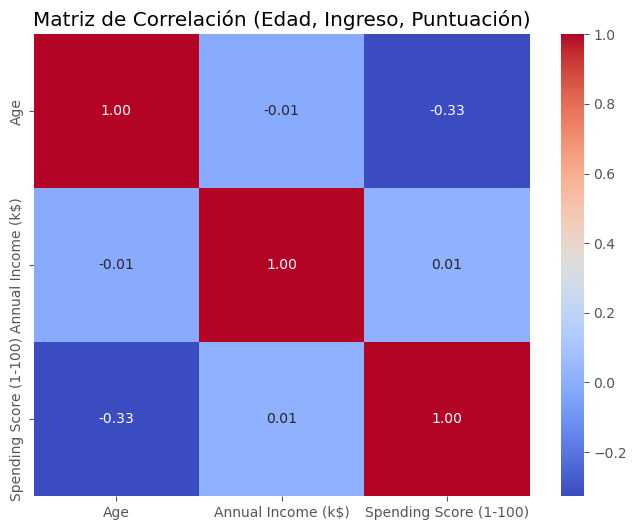


Generando pairplot...


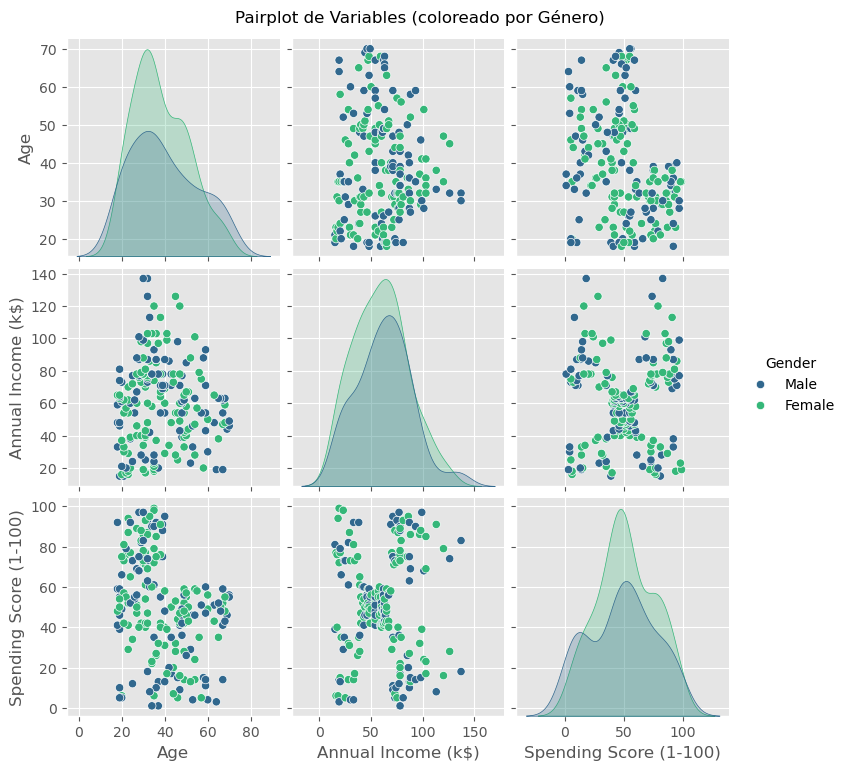


Visualización específica: Ingreso Anual vs Puntuación de Gasto


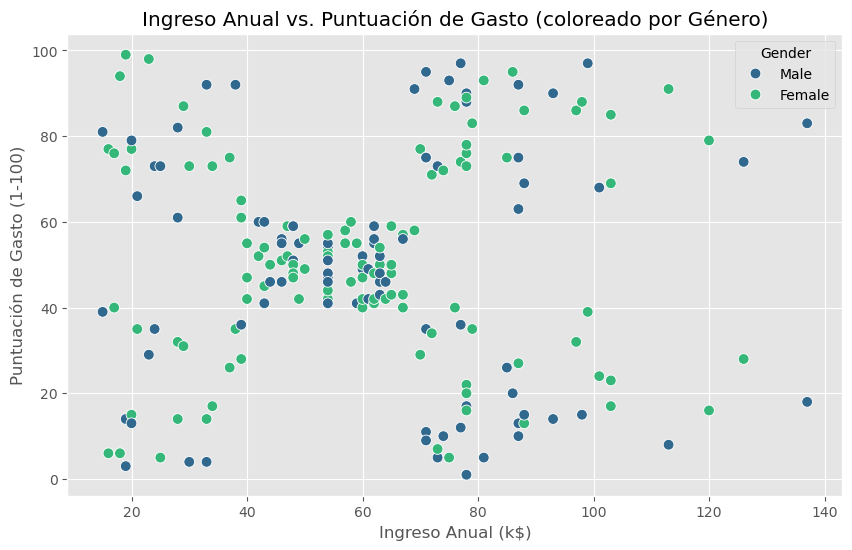

Observa si se ven grupos naturales en esta gráfica.


In [3]:
print("\n--- 1. Análisis Exploratorio de Datos (EDA) ---")


print("\nInformación General del Dataset:")
df.info()

print("\nEstadísticas Descriptivas (Numéricas):")
print(df.describe())


print("\nValores Faltantes por Columna:")
missing_values = df.isnull().sum()
print(missing_values)
if missing_values.sum() == 0:
    print("No hay valores faltantes en el dataset.")
else:
    print("¡Se encontraron valores faltantes! Se tratarán en preprocesamiento.")

numeric_features = df.select_dtypes(include=np.number).columns.tolist()
numeric_features.remove('CustomerID') # Quitar ID
categorical_features = df.select_dtypes(exclude=np.number).columns.tolist()

print(f"\nColumnas Numéricas (para análisis): {numeric_features}")  
print(f"Columnas Categóricas: {categorical_features}") 

print("\nGenerando histogramas para variables numéricas...")
df[numeric_features].hist(bins=15, figsize=(15, 5), layout=(1, 3)) 
plt.suptitle("Histogramas de Variables Numéricas (Edad, Ingreso, Puntuación)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\nGenerando boxplots para variables numéricas...")
plt.figure(figsize=(15, len(numeric_features) * 2)) 
for i, col in enumerate(numeric_features):
    plt.subplot(len(numeric_features), 1, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()


print("\nAnálisis de la variable 'Gender':")
print(df['Gender'].value_counts())
sns.countplot(x='Gender', data=df, palette='viridis')
plt.title('Distribución de Género')
plt.show()



print("\nGenerando matriz de correlación...")
corr_matrix = df[numeric_features].corr()
plt.figure(figsize=(8, 6)) # Ajustar tamaño
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación (Edad, Ingreso, Puntuación)")
plt.show()


print("\nGenerando pairplot...")
sns.pairplot(df[numeric_features + ['Gender']], hue='Gender', palette='viridis') # Incluir Gender para colorear
plt.suptitle("Pairplot de Variables (coloreado por Género)", y=1.02)
plt.show()


print("\nVisualización específica: Ingreso Anual vs Puntuación de Gasto")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette='viridis', s=60)
plt.title('Ingreso Anual vs. Puntuación de Gasto (coloreado por Género)')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gasto (1-100)')
plt.grid(True)
plt.show()
print("Observa si se ven grupos naturales en esta gráfica.")

In [4]:
# 2. Preprocesamiento de Datos

print("\n--- 2. Preprocesamiento de Datos ---")

# Seleccionar características para Clustering 

features_a_usar = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
print(f"Características seleccionadas para clustering: {features_a_usar}")

df_procesado = df[features_a_usar].copy()

# Identificar tipos de columnas para el preprocesador 
numeric_features_proc = df_procesado.select_dtypes(include=np.number).columns.tolist()
categorical_features_proc = df_procesado.select_dtypes(exclude=np.number).columns.tolist()

print(f"Features numéricas para preprocesar: {numeric_features_proc}")
print(f"Features categóricas para preprocesar: {categorical_features_proc}")


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()) # K-Means es sensible a la escala
])

# Para categóricas: Imputar (por robustez) y One-Hot Encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False))
    # drop='first' para evitar multicolinealidad (ej. solo crea 'Gender_Male')
])

# Combinar transformadores 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features_proc),
        ('cat', categorical_transformer, categorical_features_proc)
    ],
    remainder='passthrough'
)

# Aplicar el preprocesamiento 
try:
    X_processed = preprocessor.fit_transform(df_procesado)
    print("\nPreprocesamiento completado.")
    print(f"Dimensiones de los datos preprocesados: {X_processed.shape}") 

  
    try:
        
        num_feature_names = numeric_features_proc
        cat_feature_names = preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features_proc).tolist()
        feature_names_out = num_feature_names + cat_feature_names
        print("\nNombres de las características después del preprocesamiento:")
        print(feature_names_out) 
    except Exception as e:
        print(f"\nNo se pudieron obtener los nombres de las características automáticamente: {e}")
        feature_names_out = None

except Exception as e:
    print(f"\nError durante el preprocesamiento: {e}")
    X_processed = None
    feature_names_out = None
    exit()



--- 2. Preprocesamiento de Datos ---
Características seleccionadas para clustering: ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Features numéricas para preprocesar: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Features categóricas para preprocesar: ['Gender']

Preprocesamiento completado.
Dimensiones de los datos preprocesados: (200, 4)

Nombres de las características después del preprocesamiento:
['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']


In [5]:

print("\n--- 3. Selección de Características ---")

if X_processed is not None:
    X_final = X_processed
    print("Se utilizarán todas las características seleccionadas y preprocesadas.")
    print(f"Dimensiones finales para el entrenamiento: {X_final.shape}")

   

else:
    print("Error en el paso anterior, no se pueden seleccionar características.")
    X_final = None



--- 3. Selección de Características ---
Se utilizarán todas las características seleccionadas y preprocesadas.
Dimensiones finales para el entrenamiento: (200, 4)



--- 4. Entrenamiento del Modelo K-Means ---
Calculando WCSS (Inercia) para diferentes valores de K...


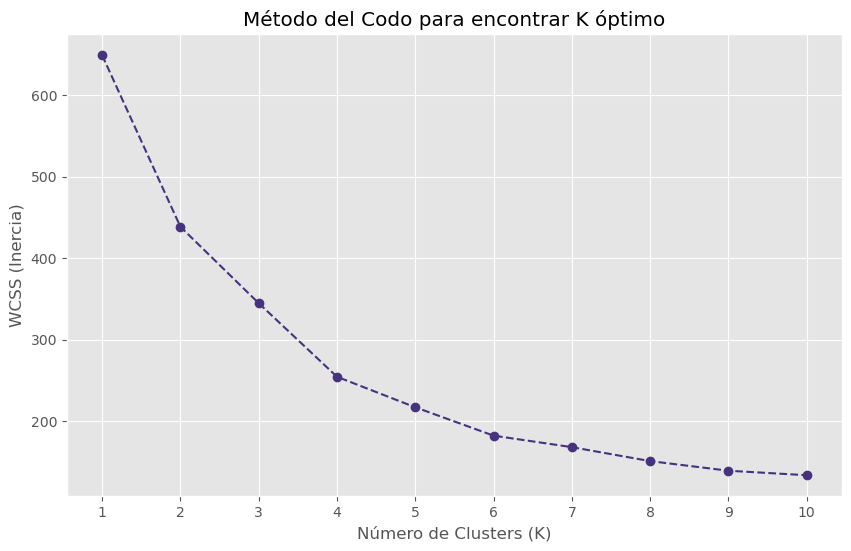

Observa el 'codo'. Para Mall_Customers, K=5 es un candidato fuerte.

Calculando Coeficiente de Silueta para diferentes valores de K...
Para K = 2, el Coeficiente de Silueta promedio es: 0.3032
Para K = 3, el Coeficiente de Silueta promedio es: 0.3150
Para K = 4, el Coeficiente de Silueta promedio es: 0.3503
Para K = 5, el Coeficiente de Silueta promedio es: 0.3498
Para K = 6, el Coeficiente de Silueta promedio es: 0.3565
Para K = 7, el Coeficiente de Silueta promedio es: 0.3433
Para K = 8, el Coeficiente de Silueta promedio es: 0.3304
Para K = 9, el Coeficiente de Silueta promedio es: 0.3400
Para K = 10, el Coeficiente de Silueta promedio es: 0.3087


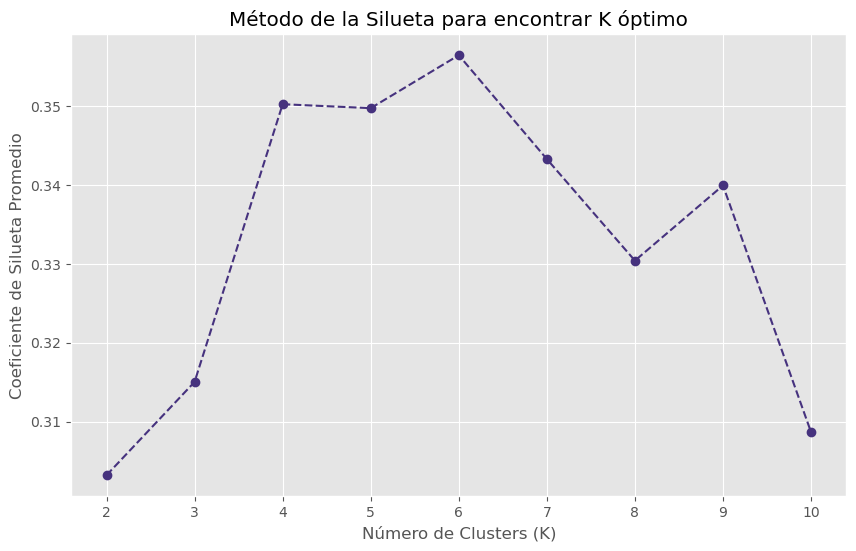

Busca el pico en la gráfica. K=5 o K=6 suelen ser buenos candidatos aquí.

Se ha seleccionado K = 5 como número óptimo de clusters (¡Revisa las gráficas!).
Entrenando el modelo K-Means final con K = 5...

Etiquetas de cluster añadidas al DataFrame original como 'Cluster_KMeans'.
Distribución de instancias por cluster:
Cluster_KMeans
0    58
1    39
2    47
3    34
4    22
Name: count, dtype: int64


In [6]:
# Entrenamiento del modelo
if X_final is not None:
    print("\n--- 4. Entrenamiento del Modelo K-Means ---")

 
    print("Calculando WCSS (Inercia) para diferentes valores de K...")
    wcss = []
    k_range = range(1, 11)
    for k in k_range:
        kmeans_test = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
        kmeans_test.fit(X_final)
        wcss.append(kmeans_test.inertia_)

    # Graficar el Método del Codo
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, wcss, marker='o', linestyle='--')
    plt.xlabel('Número de Clusters (K)')
    plt.ylabel('WCSS (Inercia)')
    plt.title('Método del Codo para encontrar K óptimo')
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()
    print("Observa el 'codo'. Para Mall_Customers, K=5 es un candidato fuerte.")

    # Método de la Silueta (Silhouette Method)
    print("\nCalculando Coeficiente de Silueta para diferentes valores de K...")
    silhouette_scores = []
    k_range_silhouette = range(2, 11)
    for k in k_range_silhouette:
        kmeans_test = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
        cluster_labels = kmeans_test.fit_predict(X_final)
        silhouette_avg = silhouette_score(X_final, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        print(f"Para K = {k}, el Coeficiente de Silueta promedio es: {silhouette_avg:.4f}")

    # Graficar el Método de la Silueta
    plt.figure(figsize=(10, 6))
    plt.plot(k_range_silhouette, silhouette_scores, marker='o', linestyle='--')
    plt.xlabel('Número de Clusters (K)')
    plt.ylabel('Coeficiente de Silueta Promedio')
    plt.title('Método de la Silueta para encontrar K óptimo')
    plt.xticks(k_range_silhouette)
    plt.grid(True)
    plt.show()
    print("Busca el pico en la gráfica. K=5 o K=6 suelen ser buenos candidatos aquí.")

    # --- Elegir K óptimo ---
    
    optimal_k = 5 
    print(f"\nSe ha seleccionado K = {optimal_k} como número óptimo de clusters (¡Revisa las gráficas!).")

 
    print(f"Entrenando el modelo K-Means final con K = {optimal_k}...")
    kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels_final = kmeans_final.fit_predict(X_final)

  
    df['Cluster_KMeans'] = cluster_labels_final
    print("\nEtiquetas de cluster añadidas al DataFrame original como 'Cluster_KMeans'.")
    print("Distribución de instancias por cluster:")
    print(df['Cluster_KMeans'].value_counts().sort_index())

else:
    print("\nEl entrenamiento no puede continuar debido a errores en pasos anteriores.")
    kmeans_final = None
    cluster_labels_final = None

In [7]:
# Evaluacion del Modelo
if kmeans_final is not None and X_final is not None:
    print("\n--- 5. Evaluación del Desempeño del Modelo ---")

    # --- Coeficiente de Silueta ---
    silhouette_avg_final = silhouette_score(X_final, cluster_labels_final)
    print(f"Coeficiente de Silueta Promedio (para K={optimal_k}): {silhouette_avg_final:.4f}")

    # --- Índice de Calinski-Harabasz ---
    calinski_harabasz_avg_final = calinski_harabasz_score(X_final, cluster_labels_final)
    print(f"Índice de Calinski-Harabasz (para K={optimal_k}): {calinski_harabasz_avg_final:.4f}")

    #  Centroides 
    centroids = kmeans_final.cluster_centers_
    print(f"\nCentroides de los clusters (en el espacio preprocesado):")
    # Crear un DataFrame para mejor visualización
    centroid_df = pd.DataFrame(centroids, columns=feature_names_out if feature_names_out else [f'feature_{i}' for i in range(X_final.shape[1])])
    print(centroid_df)
    # Interpreta estos valores: son los valores promedio (escalados/codificados) para cada feature en cada cluster.

else:
    print("\nLa evaluación no puede continuar debido a errores en pasos anteriores.")


--- 5. Evaluación del Desempeño del Modelo ---
Coeficiente de Silueta Promedio (para K=5): 0.3498
Índice de Calinski-Harabasz (para K=5): 97.2583

Centroides de los clusters (en el espacio preprocesado):
        Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0  1.198627           -0.460981               -0.327038     0.431034
1 -0.441917            0.991583                1.239503     0.461538
2 -0.781722           -0.403069               -0.215914     0.340426
3  0.173295            1.066454               -1.298010     0.588235
4 -0.974396           -1.329545                1.132178     0.409091



--- 6. Visualización de Resultados ---
Generando gráfico de dispersión: Ingreso Anual vs Puntuación de Gasto (Coloreado por Cluster)


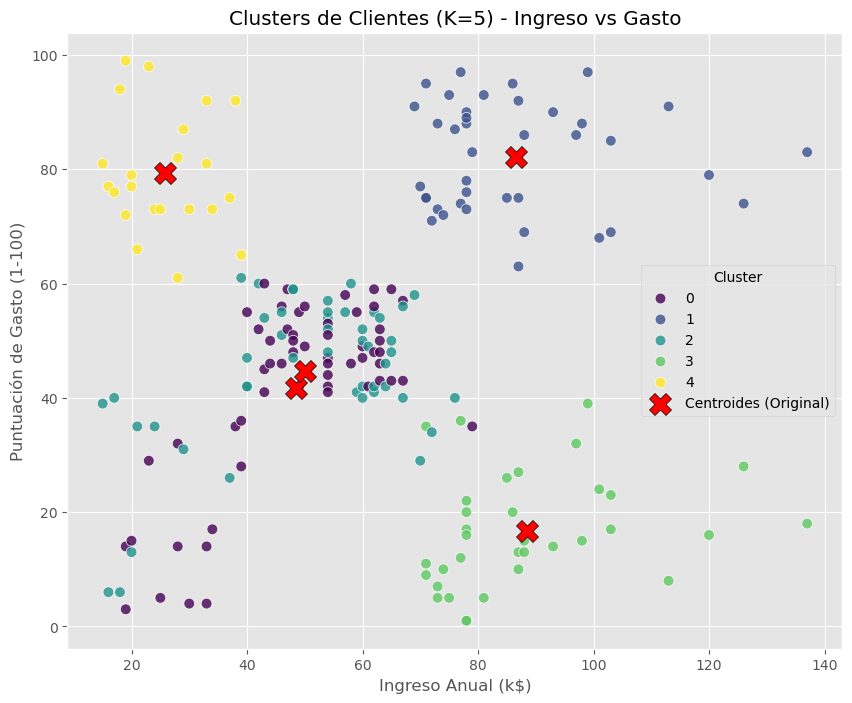


Generando visualización 2D usando PCA sobre todas las características usadas...


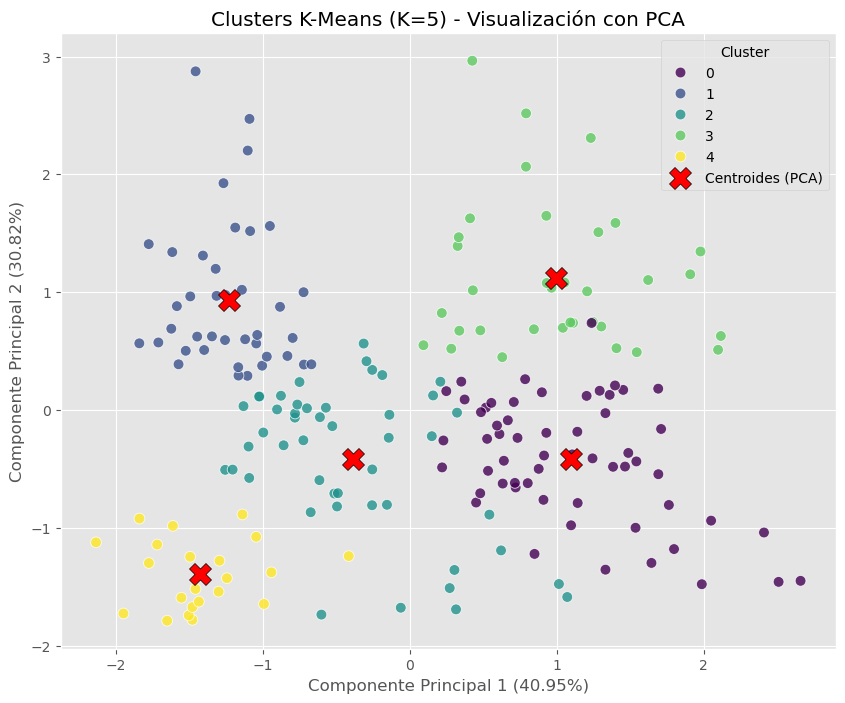


Análisis de características por cluster (medias de variables numéricas originales):
                      Age  Annual Income (k$)  Spending Score (1-100)
Cluster_KMeans                                                       
0               55.551724           48.482759               41.775862
1               32.692308           86.538462               82.128205
2               27.957447           50.000000               44.638298
3               41.264706           88.500000               16.764706
4               25.272727           25.727273               79.363636


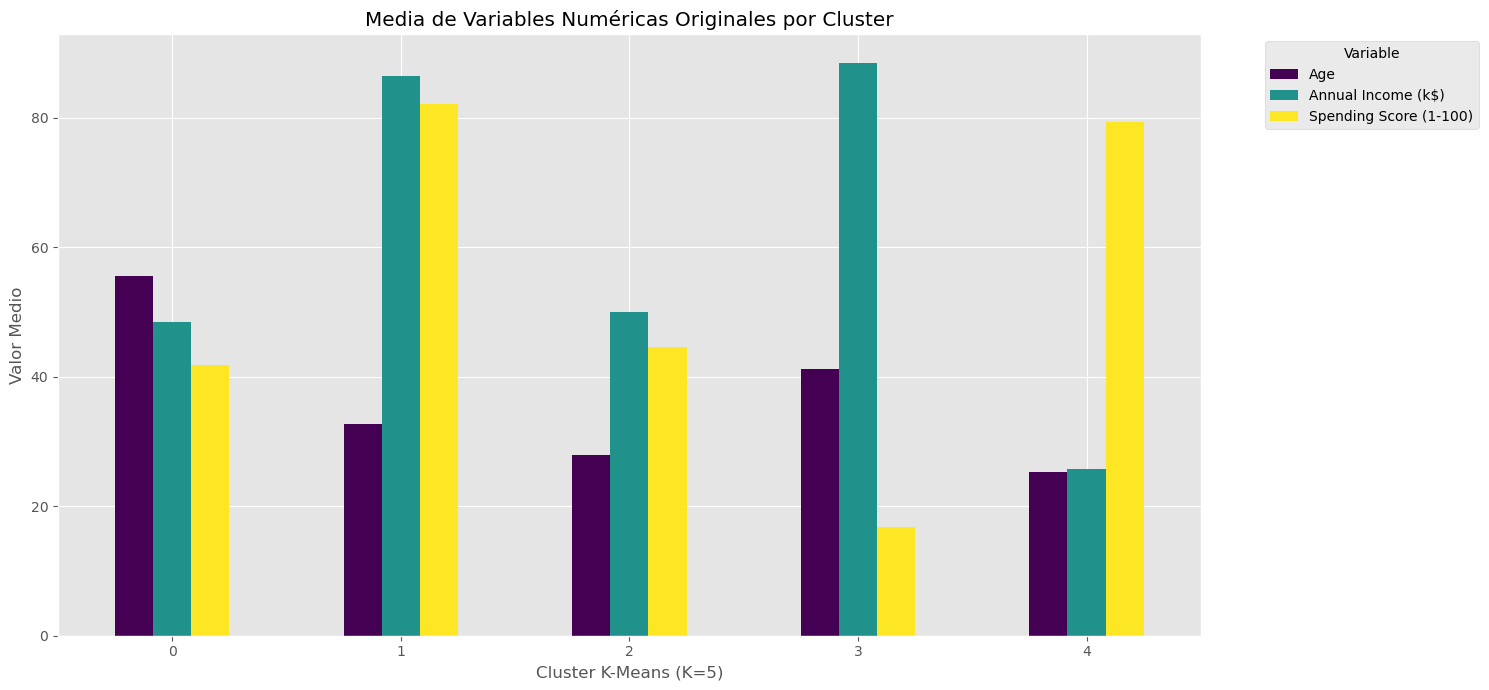


Distribución de Género por cluster:
Gender            Female      Male
Cluster_KMeans                    
0               0.568966  0.431034
1               0.538462  0.461538
2               0.659574  0.340426
3               0.411765  0.588235
4               0.590909  0.409091


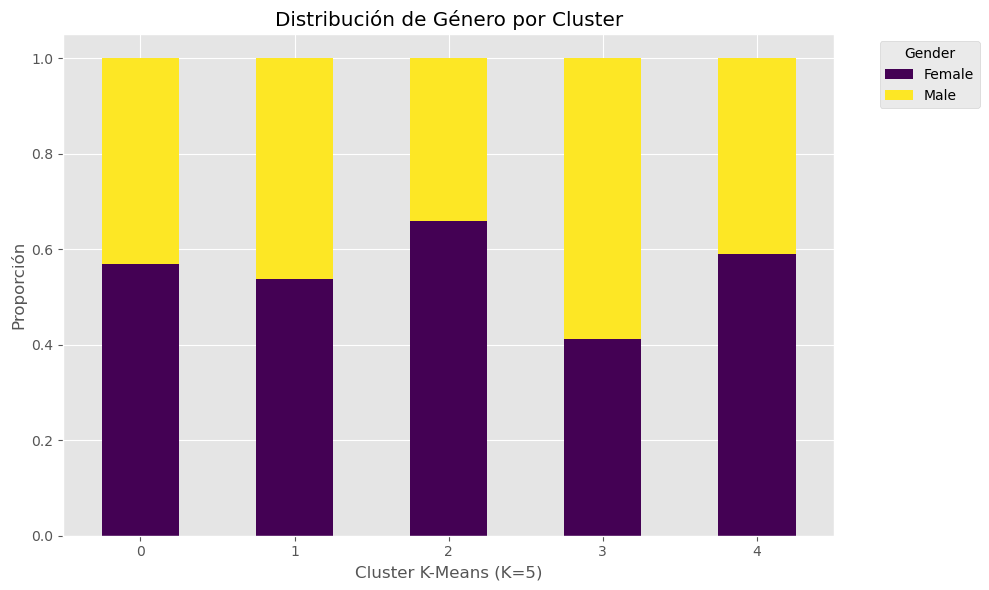


--- Fin del Proceso de Clustering K-Means para Mall_Customers ---


In [8]:
# Visualizacion de resultados 
if kmeans_final is not None and X_final is not None:
    print("\n--- 6. Visualización de Resultados ---")

    
    print("Generando gráfico de dispersión: Ingreso Anual vs Puntuación de Gasto (Coloreado por Cluster)")
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_KMeans', palette='viridis', s=60, alpha=0.8)

    
    centroids_orig_2d = df.groupby('Cluster_KMeans')[['Annual Income (k$)', 'Spending Score (1-100)']].mean().values
    plt.scatter(centroids_orig_2d[:, 0], centroids_orig_2d[:, 1], marker='X', s=250, c='red', label='Centroides (Original)', edgecolors='black')

    plt.title(f'Clusters de Clientes (K={optimal_k}) - Ingreso vs Gasto')
    plt.xlabel('Ingreso Anual (k$)')
    plt.ylabel('Puntuación de Gasto (1-100)')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()
   
    if X_final.shape[1] > 2:
        print("\nGenerando visualización 2D usando PCA sobre todas las características usadas...")
        pca_viz = PCA(n_components=2, random_state=42)
        X_pca_viz = pca_viz.fit_transform(X_final) 

       
        centroids_pca_viz = pca_viz.transform(kmeans_final.cluster_centers_)

        plt.figure(figsize=(10, 8))
        sns.scatterplot(x=X_pca_viz[:, 0], y=X_pca_viz[:, 1], hue=df['Cluster_KMeans'], palette='viridis', s=60, alpha=0.8)
        plt.scatter(centroids_pca_viz[:, 0], centroids_pca_viz[:, 1], marker='X', s=250, c='red', label='Centroides (PCA)', edgecolors='black')

        plt.title(f'Clusters K-Means (K={optimal_k}) - Visualización con PCA')
        plt.xlabel(f'Componente Principal 1 ({pca_viz.explained_variance_ratio_[0]*100:.2f}%)')
        plt.ylabel(f'Componente Principal 2 ({pca_viz.explained_variance_ratio_[1]*100:.2f}%)')
        plt.legend(title='Cluster')
        plt.grid(True)
        plt.show()
    elif X_final.shape[1] == 2:
         
         print("\nGenerando gráfico de dispersión 2D (ya que X_final tiene 2 dimensiones)")
         plt.figure(figsize=(10, 8))
         sns.scatterplot(x=X_final[:, 0], y=X_final[:, 1], hue=df['Cluster_KMeans'], palette='viridis', s=60, alpha=0.8)
         plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1], marker='X', s=250, c='red', label='Centroides', edgecolors='black')
         plt.title(f'Clusters K-Means (K={optimal_k})')
         plt.xlabel('Feature 1 / Componente Principal 1')
         plt.ylabel('Feature 2 / Componente Principal 2')
         plt.legend(title='Cluster')
         plt.grid(True)
         plt.show()


    
    print("\nAnálisis de características por cluster (medias de variables numéricas originales):")
   
    numeric_original_cols = df_original.select_dtypes(include=np.number).columns.tolist()
    if 'CustomerID' in numeric_original_cols:
        numeric_original_cols.remove('CustomerID') 

  
    if 'Cluster_KMeans' in df.columns:
        analysis_cols = numeric_original_cols + ['Cluster_KMeans']
        cluster_analysis = df[analysis_cols].groupby('Cluster_KMeans').mean()
        print(cluster_analysis)

        
        cluster_analysis.plot(kind='bar', figsize=(15, 7), subplots=False, colormap='viridis')
        plt.title('Media de Variables Numéricas Originales por Cluster')
        plt.ylabel('Valor Medio')
        plt.xlabel(f'Cluster K-Means (K={optimal_k})')
        plt.xticks(rotation=0)
        plt.legend(title='Variable', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

        
        print("\nDistribución de Género por cluster:")
        gender_cluster_analysis = df.groupby('Cluster_KMeans')['Gender'].value_counts(normalize=True).unstack()
        print(gender_cluster_analysis)
        gender_cluster_analysis.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
        plt.title('Distribución de Género por Cluster')
        plt.ylabel('Proporción')
        plt.xlabel(f'Cluster K-Means (K={optimal_k})')
        plt.xticks(rotation=0)
        plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()


    else:
         print("No se pudo realizar el análisis de clusters porque falta la columna 'Cluster_KMeans'.")


else:
    print("\nLa visualización y análisis no pueden continuar debido a errores en pasos anteriores.")

print("\n--- Fin del Proceso de Clustering K-Means para Mall_Customers ---")